# Final Report
## Anomoly Detection Project
* Corey Hermesch
* Scott Barnett
* 15 June 2023

## Goals
* Find the answers to the provided questions
* Deliver a final report to the data science team 
* Deliver a slide of findings to the Data Science team
* Deliver a professional email to the stakeholder reviewing our findings

## Imports

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import env
import os
import wrangle
import functions

## Acquire

* Data acquired from the Codeup Database and the provided anonymized-curriculum-access.txt document 
    * Files were concated on id and cohort_id respectively
* It contained **900,223 rows and 8 columns**
* The data was aquired on 14 JUNE 2023
* Each row represents a time the Codeup lesson server was accessed
* Each column represents a feature of the access event


## Prepare

* Initial preperation
    


### Data Dictionary

| Feature | Datatype | Key | Definition |
|---|---|---|---|
| Date | datetime64 | YYYY-MM-DD | Date of activity; Index |
| endpoint | object | unique | The highest value reached that day |
| user_id | int64 | unique # | Unique ID # assigned to user |
| cohort_id | int64 | unique # | Unique ID # assigned to cohort |
| source_ip | object | IP ##.###.##.## | Unique IP address assigned to location of user |
| name | object | unique | Name assigned to cohort |
| start_date | datetime64 | YYYY-MM-DD | Date cohort started |
| end_date | datetime64 | YYYY-MM-DD | Date cohort graduated |
| program_id | int64 | 1,2,3,4 | Designation given to type of program |

### Bring in Data for Exploration

In [13]:
# Bringing in data and prparing it for exploration
df = wrangle.wrangle_curriculum_logs()

### Sneak Peak at the Data


In [14]:
df.head(3)

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,program_id
date,,,,,,,,
2018-01-26,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,javascript-i/introduction/working-with-data-types-operators-and-variables,39,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2
2018-01-26,javascript-i/javascript-with-html,39,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 to 2021-04-21
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   endpoint    900222 non-null  object        
 1   user_id     900223 non-null  int64         
 2   cohort_id   900223 non-null  int64         
 3   source_ip   900223 non-null  object        
 4   name        900223 non-null  object        
 5   start_date  900223 non-null  datetime64[ns]
 6   end_date    900223 non-null  datetime64[ns]
 7   program_id  900223 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 61.8+ MB


### Summary of Data

In [16]:
df.describe()

,user_id,cohort_id,program_id
count,900223.000000,900223.000000,900223.000000
mean,458.825707,45.651349,1.963440
std,249.296767,33.800035,0.618478
min,1.000000,0.000000,0.000000
25%,269.000000,26.000000,2.000000
50%,475.000000,33.000000,2.000000
75%,660.000000,57.000000,2.000000
max,981.000000,139.000000,4.000000


## Exploration

* Questions 1,2,3,6, and 7 were selected for evaluation


### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

#### Observations: 
* program_id 1 (WebDev): javascript-i is the most accessed lesson
* program_id 2 (WebDev): javascript-i is the most accessed lesson
* program_id 3 (Data Science): classification/overview is the most accessed lesson
* program_id 4 (Apollo cohort??): only 4 rows in the dataset: content/html-css is the most accessed
* program_id 0 (UNKNOWN): javascript-i is the most accessed lesson 

In [17]:
# Get question 1 exploration
functions.question1_7(df, number=5, bottom=False)

Top 5 page access counts for program 0: 
endpoint
search/search_index.json    1985
javascript-i                 780
toc                          706
spring                       641
java-iii                     567
Name: endpoint, dtype: int64
---------------------------
Top 5 page access counts for program 1: 
endpoint
index.html      1011
javascript-i     736
html-css         542
spring           501
java-iii         479
Name: endpoint, dtype: int64
---------------------------
Top 5 page access counts for program 2: 
endpoint
javascript-i                17457
toc                         17428
search/search_index.json    15212
java-iii                    12683
html-css                    12569
Name: endpoint, dtype: int64
---------------------------
Top 5 page access counts for program 3: 
endpoint
search/search_index.json                    2203
classification/overview                     1785
1-fundamentals/modern-data-scientist.jpg    1655
1-fundamentals/AI-ML-DL-timeline.jpg      

### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

####  Observations: 
* The 

In [18]:
# Get question 2 exploration
functions.question2(df, multiplier=3)

,endpoint,Hampton,Teddy,Sequoia,Arches,Unknown cohort,Quincy,Pinnacles,Niagara,Kings,...,Darden,Bash,Jupiter,Kalypso,Luna,Easley,Marco,Florence,Neptune,Oberon
0,content/html-css/introduction.html,1,2,2,4,2,8,0,0,28,...,0,0,0,0,0,0,0,0,0,0
1,content/html-css,1,11,4,9,8,33,5,0,45,...,0,0,0,0,0,0,0,0,0,0
2,javascript-i/introduction/operators,1,109,23,53,175,7,8,1,2,...,0,92,241,171,129,0,269,0,209,179
3,content/php_iv,1,5,0,5,4,11,5,0,42,...,0,0,0,0,0,0,0,0,0,0
4,content/laravel/intro,1,6,1,23,3,38,6,0,83,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,java-iii/servlets,30,257,22,72,258,0,12,11,2,...,0,174,418,247,158,0,4,0,3,1
379,java-iii,57,732,105,153,567,3,45,29,8,...,0,324,795,456,259,0,40,0,9,1
380,javascript-i/bom-and-dom/dom,1,208,43,57,255,0,8,4,0,...,0,131,200,358,134,0,254,0,15,1
381,java-i/strings,4,134,38,44,151,5,10,2,3,...,0,100,199,141,100,0,13,0,3,1


### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

####  Observations: 
* The 

In [19]:
# Get question 3 exploration


### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

* As seen in the chart below the most referenced topics after graduation are:
    * Web Development - Java and Javascript
    * Data Science - SQL and classification

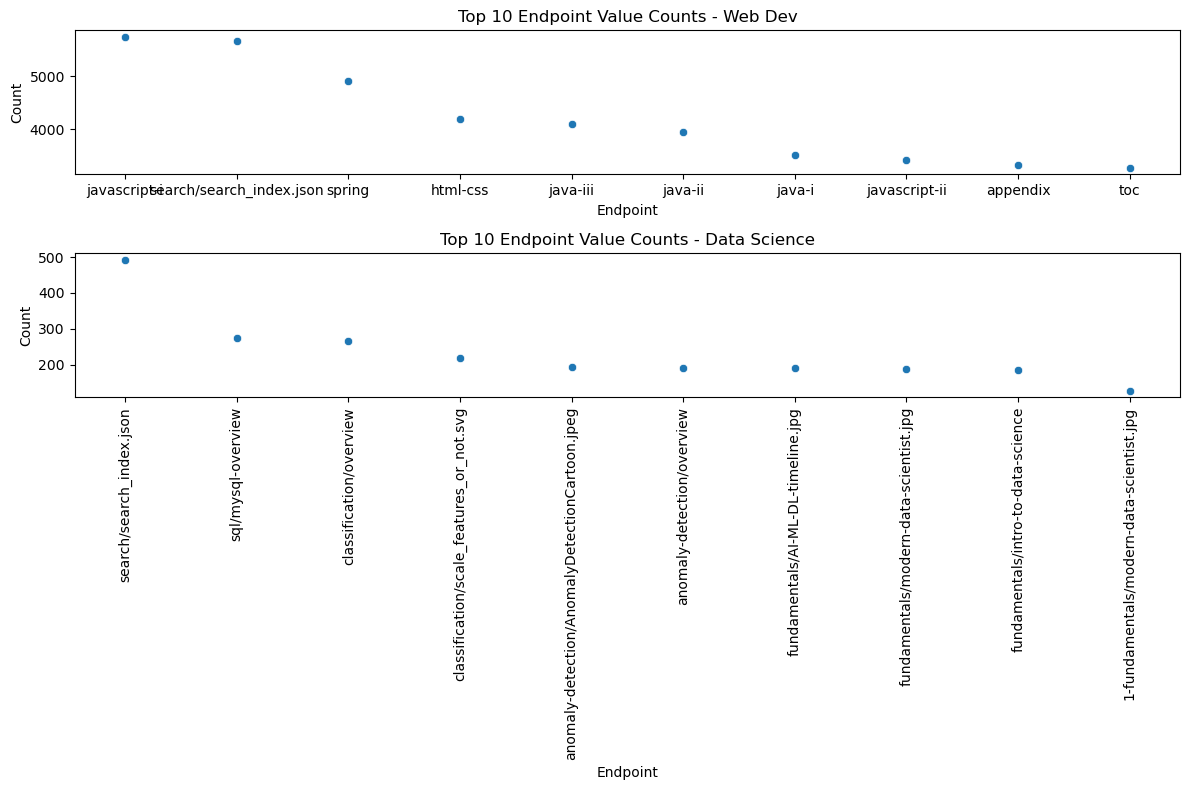

In [21]:
# Get question 6 exploration
functions.question6(df)

### 7. Which lessons are least accessed?

* 457 pages were accessed only once in the dataset
* It is unknown how many pages were not accessed at all as that info is not in the dataset
* Of the 457 pages accessed only once, here are a few trends by program. (This will take some more analysis):
    * program_id 1 (WebDev): jquery pages are low-access
    * program_id 2 (WebDev): cli pages are low-access
    * program_id 3 (Data Science): storytelling, classification
    * program_id 4 (Apollo cohort??): only 4 rows in the dataset: content/html-css is the most accessed
    * program_id 0 (UNKNOWN): classification lessons are low-access

In [22]:
# Get question 7 exploration
functions.question1_7(df, number=5, bottom=True)

Bottom 5 page access counts for program 0: 
endpoint
fundamentals/DataToAction_v2.jpg              1
7-classification/ensemble                     1
content/git/initializing-a-repository.html    1
7-classification/confusion-matrix             1
7-classification/6.4-knn                      1
Name: endpoint, dtype: int64
---------------------------
Bottom 5 page access counts for program 1: 
endpoint
html-css/media-queries                              1
content/jquery/events/keyboard-events.html          1
content/jquery/events/gitbook/images/favicon.ico    1
content/jquery/events                               1
content/jquery/essential-methods/traversing.html    1
Name: endpoint, dtype: int64
---------------------------
Bottom 5 page access counts for program 2: 
endpoint
'                                        1
classification/user-defined-functions    1
cli-02-listing-files                     1
cli-03-file-paths                        1
cli-07-more-topics                       1
Na

## Exploration Summary
* 1. The lessons with the most traffic consistently across cohorts (per program) are:
    * WebDev (Pro.1): javascript-i 
    * WebDev (Pro.2): javascript-i 
    * Data Science (Pro.3): classification/overview is the most accessed lesson
    * Apollo cohort (Pro.4):  content/html-css 
    * Unkown Grouo (Pro.0): javascript-i 
* 2. 
* 3. 
* 6.The most referenced topics after graduation are:
    * Web Development - Java and Javascript
    * Data Science - SQL and classification
* 7. Lesson accessed the least is collection of 457 lesson pages that were only accessed once.

In [ ]:
# getting chart to provide the context of the target variable showing distribution of the values and baseline


## Report - Conclusion
* We were able to address 5 of the 7 questions asked
### Summary
* 
* 
* 
* 
### Recommendations
* Provide additional takaways or downloadable docs for extensivly used topics
* Investigate the need to redo or reorganize the information on the 457 seldom used pages

### Next Steps
* If provided more time we could have looked further into the additional two questions, and connected unknown users to cohorts